In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
# By Alexandra Lee
# (created January 2019)
# 
# Explore Pseudomonas dataset in order to explain interpolation results
#-------------------------------------------------------------------------------------------------------------------------------
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import math as mt

randomState = 123
from numpy.random import seed
seed(randomState)

In [2]:
# Load data
base_dir = os.path.join(os.path.dirname(os.getcwd()), 'data')
data_file = os.path.join(base_dir, "all-pseudomonas-gene-normalized.zip")

In [3]:
# Read data
data = pd.read_table(data_file, header=0, index_col=0, compression='zip')
data = data.T
data.head()

Gene_symbol,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
0.1_12hr_CSV86(Pae_G1a).CEL,0.472897,0.396658,0.253776,0.000000,0.175640,0.554385,0.411370,0.382222,0.310144,0.642522,...,0.358597,0.390048,0.457406,0.684082,0.338351,0.608325,0.643496,0.276075,0.112773,0.145170
0.1_2hr_CSV86(Pae_G1a).CEL,0.262346,0.086216,0.359853,0.439214,0.269749,0.768433,0.212505,0.062043,0.567695,0.467073,...,0.358504,0.414206,0.389879,0.477693,0.000000,0.479385,0.154471,0.140891,0.167505,0.157060
0.1_6hr_CSV86(Pae_G1a).CEL,0.473658,0.244862,0.330750,0.097697,0.387226,0.328319,0.228820,0.330039,0.318081,0.512864,...,0.180744,0.380741,0.173501,0.251571,0.182793,0.528301,0.504985,0.499782,0.061106,0.365612
0.1_7hr_CSV86(Pae_G1a).CEL,0.439273,0.343402,0.192698,0.274677,0.628979,0.553796,0.431391,0.363480,0.385721,0.094584,...,0.346837,0.153927,0.067349,0.319723,0.282442,0.490655,0.531415,0.153880,0.132333,0.260087
0.1_9hr_CSV86(Pae_G1a).CEL,0.220827,0.145525,0.437803,0.293201,0.635120,0.462893,0.488733,0.309584,0.318646,0.591914,...,0.237726,0.301945,0.070222,0.513605,0.114277,0.360259,0.386868,0.223995,0.105343,0.102088


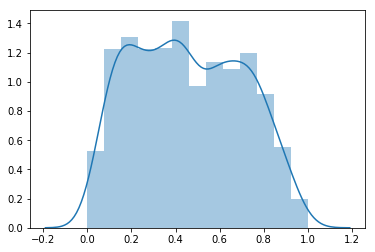

In [4]:
## 1. Distribution of PA1673 across samples

gene_id = 'PA1673'
PA1673_only = pd.DataFrame(data[gene_id], index=data.index, columns=[gene_id])
sns.distplot(PA1673_only)

In [5]:
## 2. Are the genes changing linearly with respect to PA1673?

# Sort samples by PA1673 expression (lowest --> highest)
data_sorted = data.sort_values(by=[gene_id])
data_sorted.head()

Gene_symbol,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
Glu_6Hour_(Pae_G1a).CEL,0.208763,0.206948,0.489384,0.268002,0.443039,0.655531,0.253524,0.450379,0.423884,0.647729,...,0.361040,0.464446,0.291078,0.533564,0.368903,0.873974,0.573474,0.372519,0.223440,0.198277
JS-A84.9.07.CEL,0.573841,0.393800,0.433020,0.323490,0.587715,0.522578,0.336587,0.715134,0.391078,0.245615,...,0.413921,0.430351,0.400824,0.407876,0.650810,0.840608,0.494076,0.391068,0.253154,0.035655
GSM774141_B12-0_3.CEL,0.888877,0.794609,0.675173,0.810603,0.676368,0.476494,0.144484,0.907763,0.968479,0.196780,...,0.651603,0.719922,0.808752,0.915146,0.869980,0.255556,0.783530,0.878509,0.880646,0.825883
GSM774136_B6-4_1.CEL,0.846536,0.764321,0.674080,0.924636,0.708149,0.427118,0.134049,0.870328,0.881907,0.244134,...,0.720432,0.709724,0.733110,0.832469,0.925607,0.235217,0.835157,0.838456,0.819095,0.743265
120330-10978D_M4_(Pae_G1a).CEL,0.656005,0.789647,0.390163,0.641505,0.429094,0.441882,0.323045,0.494680,0.626833,0.282136,...,0.244071,0.563862,0.575157,0.758608,0.663031,0.144855,0.291325,0.513102,0.753419,0.674350


In [ ]:
# For each gene plot gene expression trend along PA1673 gradient
# Use pearson correlation score to compare PA1673 profile with all other genes
# Pearson correlation evaluates the linear relationship between two continuous variables
data_corr = data_sorted.corr(method='pearson')
data_corr.head()

In [ ]:
# Plot distribution of correlation scores
data_corr_PA1673 = data_corr[gene_id]
sns.distplot(data_corr_PA1673)

In [ ]:
# %%time
# # Plot the expression of genes along the PA1673 gradient:
# # Are the genes changing linearly with respect to PA1673?

# # Sort samples by PA1673 expression (lowest --> highest)
# data_sorted = data.sort_values(by=[gene_id])
# data_sorted.head()

# # For each gene plot gene expression trend along PA1673 gradient

# # Initialize the figure
# plt.style.use('seaborn-darkgrid')
 
# # create a color palette
# palette = plt.get_cmap('Set1')
 
# # multiple line plot
# num_samples = data_sorted.shape[0]
# num_panels = 100

# for panel in range(num_samples%num_panels):
#     rows = mt.sqrt(num_panels)
#     cols = rows
#     num=0
    
#     # Not incrementing correctly here
#     data_subsample = data_sorted.drop(gene_id, axis=1).iloc[:,panel:num_panels]
    
#     for column in data_subsample:
#         num+=1

#         # Find the right spot on the plot
#         plt.subplot(rows,cols, num)

#         # Plot the lineplot
#         plt.plot(data_sorted[gene_id], data_subsample[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)

#         # Same limits for everybody!
#         plt.xlim(0,1)
#         plt.ylim(0,1)

#         # Not ticks everywhere
#         #if num in range(7) :
#         #    plt.tick_params(labelbottom='off')
#         #if num not in [1,4,7] :
#         #    plt.tick_params(labelleft='off')

#         # Add title
#         plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

#     # general title
#     plt.suptitle("How gene expression changed\nalong PA1673 gradient?", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

#     # Axis title
#     plt.text(0.5, 0.02, 'PA1673 expression', ha='center', va='center')
#     plt.text(0.06, 0.5, 'Gene i expression', ha='center', va='center', rotation='vertical')
    
#     # Save each panel as a figure
#     base_dir = os.path.join(os.path.dirname(os.getcwd()), 'VAE', 'output')
#     file_out = PdfPages(os.path.join(base_dir, 'Panel_{}.pdf'.format(panel)))
#     plt.savefig(file_out, format='pdf', bbox_inches = 'tight')
#     plt.show()
#     file_out.close()
